## **Scikit-Learn**

Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import metrics

#Imports pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#biblioteca para visualização de dados
import matplotlib.pyplot as plt

#Imports de seleçao de modelos
from sklearn.model_selection import train_test_split

#imports regressão
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

#imports clusterização
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#Import classificação
from sklearn import svm

**Pré-processamento**

In [ ]:
data = pd.DataFrame(
    np.array([5,7,8, 3.66, 784.98, 234.4, -5,
              0,25,999,1,-1, 23, 0, 34.7])\
              .reshape((5,3)))
data.columns = ['f1', 'f2', 'f3'] #feature 1, feature 2, feature 3

data

,f1,f2,f3
0,5.00,7.00,8.0
1,3.66,784.98,234.4
2,-5.00,0.00,25.0
3,999.00,1.00,-1.0
4,23.00,0.00,34.7


A **padronização** é uma transformação que tem como objetivo fazer com que todas as variáveis (features) estejam na mesma ordem de grandeza.

> Essa técnica melhora o desempenho dos modelos drasticamente.


In [ ]:
#Padronização
#fórmula ---> x_scaled = (x — u) / s

scaler = StandardScaler()
scaler.fit_transform(data.f3.values.reshape(-1, 1))

array([[-0.59352247],
       [ 1.97969636],
       [-0.40030374],
       [-0.69581474],
       [-0.29005541]])

A **normalização** é um outro tipo de transformação que possui o mesmo objetivo.

In [ ]:
#Normalização dados
#fórmula ---> x_scaled = (x-min(x)) / (max(x)–min(x))

scaler = MinMaxScaler(feature_range=(-3,3))
scaler.fit_transform(data.f3.values.reshape(-1, 1))

array([[-2.77060323],
       [ 3.        ],
       [-2.33729822],
       [-3.        ],
       [-2.09005947]])

**OneHotEnconding** é uma técnica usada para representar variáveis categóricas como valores numéricos.

> Também melhora o desempenho dos modelos.

In [ ]:
person = pd.DataFrame(
    np.array(['M', 'O-', 'medium',
              'F', 'O+', 'high',
              'F', 'AB', 'low'])
              .reshape((3,3)))
person.columns = ['sex', 'blood_type', 'edu_level']

person

,sex,blood_type,edu_level
0,M,O-,medium
1,F,O+,high
2,F,AB,low


In [ ]:
#Criando um enconder and ajustando os dados com fit()
enc = OneHotEncoder(sparse_output=False).fit(person)
encoded = enc.transform(person)

# Convertendo o dataframe
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
encoded_df.head()

,sex_F,sex_M,blood_type_AB,blood_type_O+,blood_type_O-,edu_level_high,edu_level_low,edu_level_medium
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Regressão Linear**

In [2]:
#Criando dados de regressão randômicos
x, y = make_regression(n_samples=300, n_features=1, noise=30)

#n_samples — amostras de dados
#n_features — inputs do modelo
#noise — Dispersão dos dados

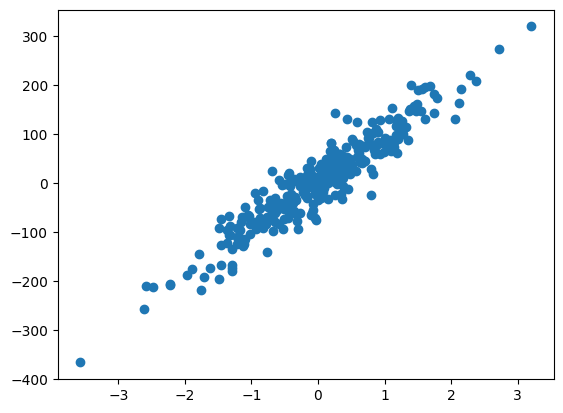

In [3]:
#Usando matplotlib para visualizar os dados criados
plt.scatter(x,y)
plt.show()

In [4]:
#Criando o modelo de regressão
model = LinearRegression()

In [5]:
#Apresentando os dados ao modelo
model.fit(x,y)

LinearRegression()

In [6]:
#Realizando a previsão de novos valores (y) a partir de cada valor de (x)
model.predict(x)

array([  55.34844163,  -17.74529822,   93.58861069,  110.12666236,
        -59.44970958,  157.06025839,  -40.3594898 ,  -35.15247782,
         94.65939453,   63.5473512 ,   42.73522895,    2.86716109,
         46.30980034,   36.91623711,  150.46933273,   20.88725363,
        -32.82304562,   -1.34767457,   15.42894252,  108.15368459,
        -36.28145063,   -9.17875242,  -54.47970549,  -15.72931553,
         12.91669057,  -48.19155385,  -13.53321034,   16.33097395,
        -36.72488137,   71.52853959,   17.55548127,   26.58169374,
       -131.97328561,  -51.70608862,  -22.19649116,   85.19109021,
         17.38985071,   33.62878048,  -46.62150156,   88.61761436,
         63.39174362,  -62.75362086, -107.21369657,  197.69058145,
         95.11765621,  -85.1708892 ,  -57.52898895, -103.16396746,
        115.37423319, -119.8669064 , -134.72438667,  112.50151138,
        -15.66565051,    9.59128938, -132.16626035, -327.19859481,
         81.58980073,   41.80340728,  120.57425053,   82.29157

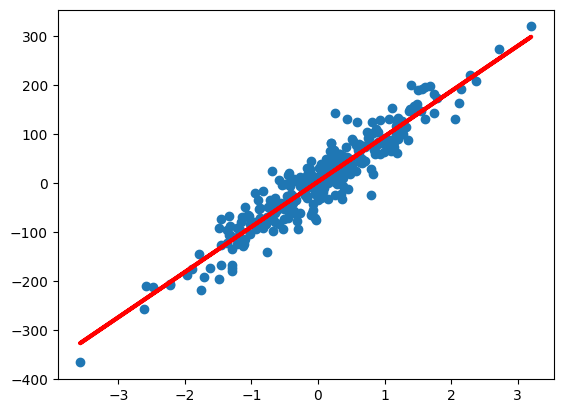

In [7]:
#A relação entre x e y é estudada pela regressão linear simples através de uma fórmula que desenha uma reta.

#plotando a reta de regressão linear
plt.scatter(x,y)
plt.plot(x, model.predict(x), color='red', linewidth=3)
plt.show()

**Clusterização**

In [ ]:
#Criando dados de clusterização randômicos
x1, y1 = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.5,
                    shuffle=True, random_state=0)

In [ ]:
#Usando matplotlib para visualizar os dados criados
plt.scatter(x1[:, 0], x1[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.show()

In [ ]:
#Criando o modelo de clusterização usando o algoritmo KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

In [ ]:
y_km = km.fit_predict(x1)

In [ ]:
#Plotando os 3 clusters
colors = ['lightgreen', 'orange', 'lightblue']

for k, col in enumerate(colors):
    cluster_data = y_km == k
    plt.scatter(x1[cluster_data, 0], x1[cluster_data, 1], c=col, marker='s', s=50,
                edgecolor='black', label='cluster '+str(k+1))

#Plotando os centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*',
            c='red', edgecolor='black', label='centroids')


plt.legend(scatterpoints=1)
plt.grid()
plt.show()

**Classificação**

In [ ]:
#Utilizando um dataset já disponível
cancer = datasets.load_breast_cancer()

In [ ]:
#Exibindo as features do dataset
print("Features: ", cancer.feature_names)

#Exibindo os tipos de labels presentes no dataset ('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [ ]:
#Verificando o shape
cancer.data.shape

(569, 30)

In [ ]:
#Dividindo meu dataset em treino e teste
#80% pra treino e 20% pra teste
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=109)

In [ ]:
#Gerando o classificador com o algoritmo SVM
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Treinando o modelo com os conjuntos de treino
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
#Fazendo a predição com o conjunto de teste
y_pred = clf.predict(x_test)

In [ ]:
#Calculando a métrica de acurácia do modelo
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


In [ ]:
#Calculando a métrica de precisão
print("Precision:", metrics.precision_score(y_test, y_pred))

Precision: 0.9859154929577465


In [ ]:
#Calculando a métrica de recall
print("Recall:", metrics.recall_score(y_test, y_pred))

Recall: 0.9459459459459459
